In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import cv2
import os
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow
from numpy import savetxt
powarr = [64,128,1 ,32,0, 2, 16, 8, 4 ]
temp = np.zeros(9)

def nri_uniform():
	a = [  1, 3, 7, 15, 31, 63, 127 ]
	b = []
	INT_BITS = 8
	d=1


	for j in range(len(a)):	
		for i in range(0,8):
			b.append(((a[j] << i)|(a[j] >> (INT_BITS - i)))&0b11111111)
			#b = np.unique(b)
	b.append(0)
	b.append(255)
	b.sort()
	return b

def get_val_nri_uniform(n):
	if n in b :
		return b.index(n)
	else:
		return 59  

def pixel(img,x,y):
    
    tem = img[x-1:x+2,y-1:y+2]
    
    a = [-1,0,1]
    k =0
    for i in a:
      for j in a:
        temp[k] = tem[i,j]
        k+= 1
    cent = temp[4]
    sval = 0
    mval = 0
    cval = 0
    if img[x][y]>=c:
      cval=255
    for z in range(0,9):
      if temp[z]>=cent:
        sval+= powarr[z]
      if abs(int(temp[z])-int(cent)) > c:
        mval+= powarr[z]
        
    return sval,mval,cval

1 24


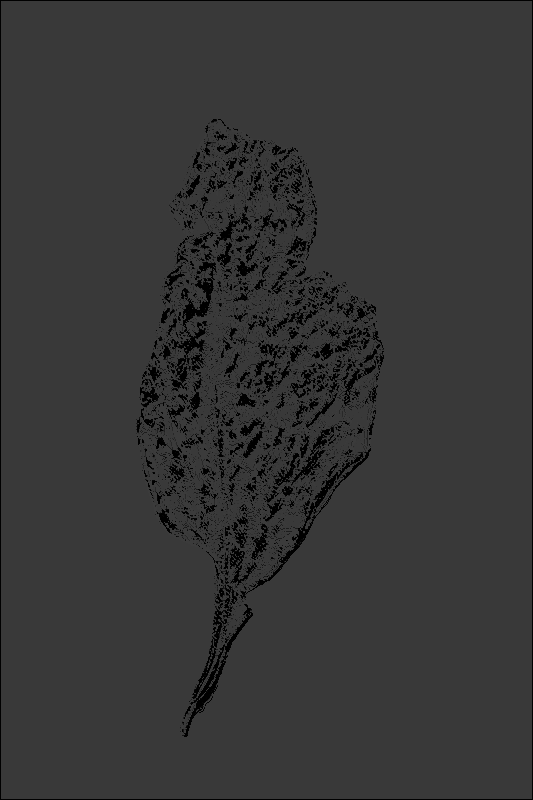

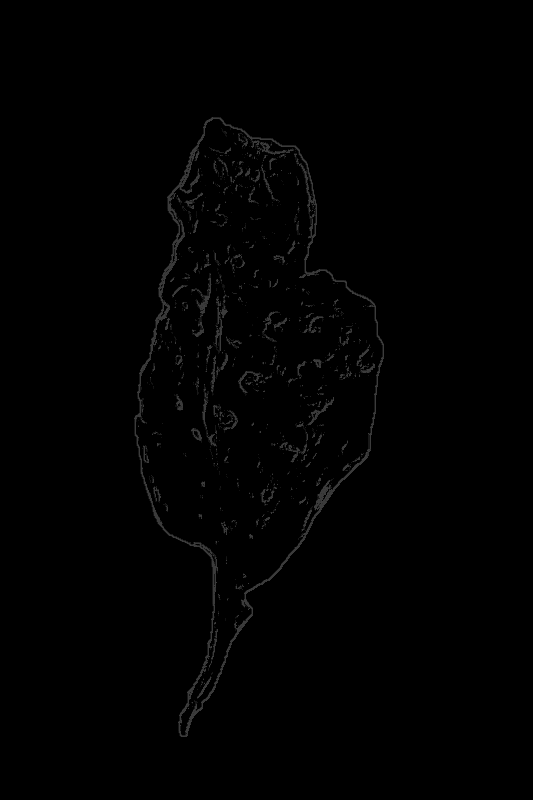

(1, 426400)


In [11]:

read_path = 'drive/My Drive/Dataset/Bacterial Spot/Extracted Image'
X = []
count=1
b = nri_uniform()
#print(get_val_nri_uniform(2))
for file in os.listdir(read_path):
  if file.endswith('extract25.png'):
    img=cv2.imread(os.path.join(read_path,file),0)
    #img=cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    img = cv2.bilateralFilter(img,11,17,17)
    #cv2_imshow(img)
    height,width= img.shape
    s = np.zeros((height, width), np.uint8)
    m = np.zeros((height, width), np.uint8)
    ce = np.zeros((height, width), np.uint8)
    nri_s = np.zeros((height, width), np.uint8)
    nri_m = np.zeros((height, width), np.uint8)
    #img,s,v=img[:,:,0],img[:,:,1],img[:,:,2]
    #print(h.shape)
    c = int(np.mean(img))
    print(count, c)
    count+=1
    for i in range(1, height-1):
      for j in range(1, width-1):
        s[i,j],m[i,j],ce[i,j] = pixel(img,i,j)
        nri_s[i,j] = get_val_nri_uniform(s[i][j])
        nri_m[i,j] = get_val_nri_uniform(m[i][j])
    X.append(s.flatten())
    # SH = cv2.calcHist([s],[0],None,[254],[1,255])
    # MH = cv2.calcHist([m],[0],None,[255],[1,256])
    # NRISH = cv2.calcHist([nri_s],[0],None,[60],[0,60])
    # NRIMH = cv2.calcHist([nri_m],[0],None,[60],[0,60])
    # fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4)
    # ax1.plot(SH)
    # ax2.plot(MH)
    # ax3.plot(NRISH)
    # ax4.plot(NRIMH)
    # plt.show()
    d_clbp=np.concatenate((s,m,ce))
    final = np.concatenate((nri_s,nri_m))
    #cv2_imshow(d_clbp)
    #cv2_imshow(final)
    cv2_imshow(nri_s)
    cv2_imshow(nri_m)
    
X= np.asarray(X)
print(X.shape)

#savetxt('drive/My Drive/CLBP_M_LBLIGHT_GRAY.csv',X,delimiter = ',')

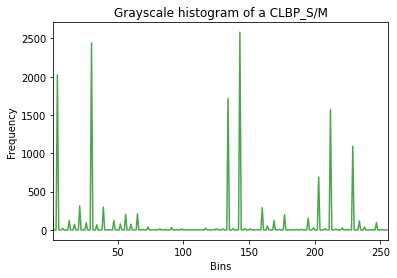

In [0]:
import cv2
from matplotlib import pyplot as plt
import numpy as np 
import os
from numpy import savetxt,loadtxt
from scipy.interpolate import make_interp_spline, BSpline
from scipy.ndimage.filters import gaussian_filter1d

read_path = 'drive/My Drive/review' 2 #'Dataset/bacterialspot/Extracted Image' 
#write_path = '/home/abishek/FYP/Final-Year-Project/Dataset/bacterialspot/features'
X_bgr = []
X_hsv = []




for file in os.listdir(read_path):
	if file.endswith('bspot_dCLBP.png'):
		bgr_img = cv2.imread(os.path.join(read_path,file),0)
		#bgr_img = cv2.cvtColor(bgr_img,cv2.COLOR_BGR2HSV)	
		#bgr_hsv = cv2.cvtColor(bgr_img,cv2.COLOR_BGR2HSV)
		hist_b = cv2.calcHist([bgr_img],[0],None,[256],[1,60])
		hist_g = cv2.calcHist([bgr_img],[1],None,[255],[1,256])
		hist_r = cv2.calcHist([bgr_img],[2],None,[255],[1,256])
	

	
		#bins = np.asarray([x for x in range(1,55)])
		# xnew = np.linspace(bins.min(), bins.max(), 50) 
		# print(bins)
		# spl1 = make_interp_spline(bins,hist_b,k=3)
		# smooth1 = spl1(xnew)
		# spl2 = make_interp_spline(bins,hist_g,k=3)
		# smooth2 = spl2(xnew)
		# spl3 = make_interp_spline(bins,hist_r,k=3)
		# smooth3 = spl3(xnew)
		#smooth1 = smooth1.T[0]
		# smooth2 = smooth2.T[0]
		# smooth3 = smooth3.T[0]
		
		#smooth1 = gaussian_filter1d(smooth1, sigma=1.5)
		# smooth2 = gaussian_filter1d(smooth2, sigma=1.5)
		# smooth3 = gaussian_filter1d(smooth3, sigma=1.5)
		
		#plt.fill_between(xnew,0,smooth1,color = 'b', alpha = 0.3)
		#plt.fill_between(xnew,0,smooth2,color = 'g', alpha = 0.3)
		#plt.fill_between(xnew,0,smooth3,color = 'r', alpha = 0.3)
		plt.plot(hist_b,color = 'b' ,alpha = 0.7)
		plt.plot(hist_g,color='g',alpha=0.7)
		plt.plot(hist_r,color='r',alpha=0.7)
		# plt.plot(xnew,smooth3,color = 'r',alpha = 0.3)

		plt.xlim([1,256])
		#plt.ylim([0,2500])
		#plt.fill(hist_b, alpha = 0.5)
		#plt.ylim([0,4000])
		plt.xlabel('Bins')
		plt.ylabel('Frequency')
		#plt.title('Grayscale histogram of a CLBP_S/M')
		# ax2.plot(hist_h)

		plt.show()
		# hist_b = hist_b.astype('int')
		# hist_g = hist_g.astype('int')
		# hist_r = hist_r.astype('int')
		# #hist_h = hist_h.astype('int')
		# hist_b = hist_b.T[0]
		# hist_g = hist_g.T[0]
		# hist_r = hist_r.T[0]
		# #hist_h = hist_h.T[0]
		# hist = np.concatenate((hist_b,hist_g))
		# hist = np.concatenate((hist,hist_r))
		# X_bgr.append(hist)
		#X_hsv.append(hist_h)




#features1 = np.asarray(X_bgr)
#features2 = np.asarray(X_hsv)
#print(features1.shape)
#print(features2.shape)

#savetxt('')

#savetxt(os.path.join(write_path,'bacterialspot_bgr_hist.csv'), features1, delimiter=',',fmt='%8.0u')
#savetxt(os.path.join(write_path,'bacterialspot_h_hist.csv'), features2, delimiter=',',fmt='%8.0u')
#data = loadtxt('bacterialspot_bgr_hist.csv', delimiter=',')
#print(data.shape)



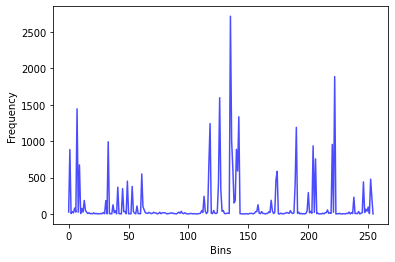

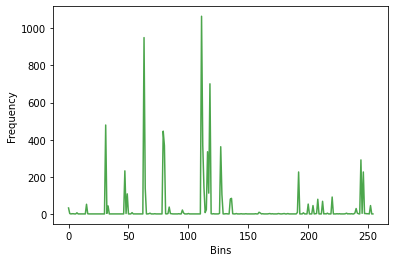

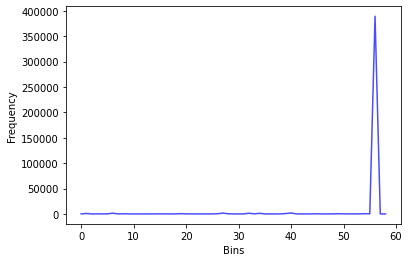

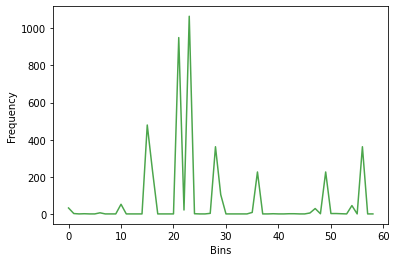

In [10]:
import cv2
from matplotlib import pyplot as plt
import numpy as np 
import os
from numpy import savetxt,loadtxt
from scipy.interpolate import make_interp_spline, BSpline
from scipy.ndimage.filters import gaussian_filter1d

hist_gray_s=cv2.calcHist([s],[0],None,[255],[1,255])
hist_gray_m=cv2.calcHist([m],[0],None,[255],[1,255])
hist_gray_nris=cv2.calcHist([nri_s],[0],None,[59],[1,59])
hist_gray_nrim=cv2.calcHist([nri_m],[0],None,[59],[1,59])

plt.plot(hist_gray_s,color = 'b' ,alpha = 0.7)
#plt.xlim([1,256])
plt.xlabel('Bins')
plt.ylabel('Frequency')
plt.show()

plt.plot(hist_gray_m,color='g',alpha=0.7)
#plt.xlim([1,256])
plt.xlabel('Bins')
plt.ylabel('Frequency')
plt.show()

plt.plot(hist_gray_nris,color='b',alpha=0.7)
#plt.xlim([0,60])
plt.xlabel('Bins')
plt.ylabel('Frequency')
plt.show()

plt.plot(hist_gray_nrim,color='g',alpha=0.7)
#plt.xlim([0,60])
plt.xlabel('Bins')
plt.ylabel('Frequency')
plt.show()
